In [1]:
import os
import datetime
import numpy as np
from PIL import Image, ImageFilter, ImageDraw, ImageFont

In [2]:
def generate_unique_name(prefix="file", extension=".txt"):
    current_time = datetime.datetime.now()
    timestamp = current_time.strftime("%Y%m%d_%H%M%S_%f")
    unique_name = f"{prefix}_{timestamp}{extension}"

    return unique_name

unique_filename = generate_unique_name(prefix="report", extension=".txt")
print(unique_filename)

report_20250225_123655_366235.txt


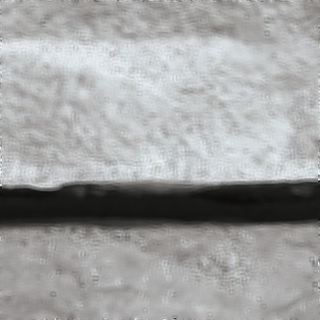

In [3]:
def bg_generate(texture_path, w=320, h=320, alpha=50):
    texture_path = os.path.join(texture_path, np.random.choice(os.listdir(texture_path)))
    with Image.open(texture_path) as bg:
        bg_w, bg_h = bg.size

        if bg_w > (w + alpha) and bg_h > (h + alpha):
            start_x = np.random.randint(0, int(bg_w - w))
            end_x = start_x + w
            start_y = np.random.randint(0, int(bg_h - h))
            end_y = start_y + h
            bg = bg.crop((start_x, start_y, end_x, end_y))
        else: bg = bg.resize((w, h))

        # transform
        bg = bg.rotate(np.random.choice([0, 90, 180, 270]))
        if np.random.random() <= 0.5:
            bg = bg.filter(np.random.choice([
                ImageFilter.BLUR, 
                ImageFilter.DETAIL, 
                ImageFilter.EDGE_ENHANCE,
                ImageFilter.GaussianBlur,
            ]))

        return bg

bg_generate('./texture')


In [4]:
def number_generate(letter_num=10):
    russian_alphabet = [
        'А', 'Б', 'В', 'Г', 'Д', 'Е', 'Ё', 'Ж', 'З', 'И', 'Й', 'К', 'Л', 'М', 'Н', 'О', 'П', 'Р', 'С', 'Т', 'У', 'Ф', 'Х', 'Ц', 'Ч', 'Ш', 'Щ', 'Ъ', 'Ы', 'Ь', 'Э', 'Ю', 'Я',  # 大写字母
        'а', 'б', 'в', 'г', 'д', 'е', 'ё', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я'   # 小写字母
    ]

    english_alphabet = [
        'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',  # 大写字母
        'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'   # 小写字母
    ]

    numbers = [
        1, 0, 2, 3, 4, 5, 6, 7, 8, 9, '-', '/'
    ]

    numbers.extend(english_alphabet)
    numbers.extend(russian_alphabet)
    return ' '.join(np.random.choice(numbers, letter_num))

number_generate()

'т q п U a р E п R P'

In [2]:
names = [
    '1', '0', '2', '3', '4', '5', '6', '7', '8', '9', '-', '/',
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',  # 大写字母
    'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',   # 小写字母
    'А', 'Б', 'В', 'Г', 'Д', 'Е', 'Ё', 'Ж', 'З', 'И', 'Й', 'К', 'Л', 'М', 'Н', 'О', 'П', 'Р', 'С', 'Т', 'У', 'Ф', 'Х', 'Ц', 'Ч', 'Ш', 'Щ', 'Ъ', 'Ы', 'Ь', 'Э', 'Ю', 'Я',  # 大写字母
    'а', 'б', 'в', 'г', 'д', 'е', 'ё', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я',   # 小写字母
]

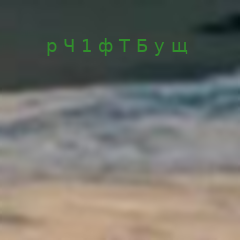

In [6]:
def generate(font_path, texture_path, save_path, names, width=320, height=320, alpha=50, letter_num=10, show=False, save=False):
    bg = bg_generate(texture_path, width, height, alpha)
    draw = ImageDraw.Draw(bg)    
    
    font_path = os.path.join(font_path, np.random.choice(os.listdir(font_path)))
    try:
        font = ImageFont.truetype(font_path, (min(bg.size) // 13))  # 设置字体大小
    except IOError:
        font = ImageFont.load_default()  # 如果字体加载失败，则使用默认字体
    
    text = number_generate(letter_num)
    bbox = draw.textbbox((0, 0), text, font=font) # left top (x, y) right bottom (x, y)
    all_w, all_h = bbox[2] - bbox[0], bbox[3] - bbox[1]
    start_x, start_y = np.random.randint(alpha // 2, bg.size[0] - all_w - alpha), np.random.randint(alpha // 2, bg.size[1] - all_h - alpha)
    
    random_color = (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255))
    draw.text((start_x, start_y), text, font=font, fill=random_color)

    text_, w = '', 0
    label_file_name = os.path.join(save_path, generate_unique_name('number', '.txt'))
    img_file_name = label_file_name[:-3] + 'jpg'
    for t in text:
        bbox_padding = 1
        bbox = draw.textbbox((start_x + w, start_y), t, font=font)

        if show and t != ' ':
            draw.rectangle(
                [bbox[0] - bbox_padding, bbox[1] - bbox_padding, bbox[2] + bbox_padding, bbox[3] + bbox_padding],
                outline="red", width=1
            )
        
        if save and t != ' ' and not show:
            if not os.path.exists(save_path): os.mkdir(save_path)
            with open(label_file_name, 'a') as f:
                label = names.index(t)
                b_w = (bbox[2] + 2 * bbox_padding - bbox[0])
                b_h = (bbox[3] + 2 * bbox_padding - bbox[1])
                b_x = bbox[0] - bbox_padding + b_w * 0.5
                b_y = bbox[1] - bbox_padding + b_h * 0.5
                f.write(f'{label} {b_x / width} {b_y / height} {b_w / width} {b_h / height}\n')

        
        text_ += t
        bbox_ = draw.textbbox((start_x, start_y), text_, font=font)
        w, _ = bbox_[2] - bbox_[0], bbox_[3] - bbox_[1]
    
    if save and not show: 
        bg.save(img_file_name)
    
    return bg

generate(font_path='./font', texture_path='./texture', save_path='./save', names=names, width=240, height=240, letter_num=8, show=False, save=True)

In [ ]:
import h5py
import os
from PIL import Image

def load_annotations(mat_path):
    """加载.mat文件的标注信息"""
    annotations = []
    with h5py.File(mat_path, 'r') as f:
        digit_struct = f['digitStruct']
        names = digit_struct['name']
        bboxs = digit_struct['bbox']
        num_items = names.shape[0]
        for i in range(num_items):
            # 解析文件名
            name_ref = names[i][0]
            filename = ''.join(chr(c) for c in f[name_ref][()].flatten())
            
            # 解析bbox信息
            bbox_ref = bboxs[i].item()
            bbox_info = f[bbox_ref]
            labels = []
            lefts = []
            tops = []
            widths = []
            heights = []
            for key in ['label', 'left', 'top', 'width', 'height']:
                attr = bbox_info[key]
                # 处理单值和多值情况
                if attr.shape[0] == 1:
                    values = [int(attr[0][0])]
                else:
                    values = [int(f[attr[j][0]][()][0][0]) for j in range(attr.shape[0])]
                # 存储对应属性
                if key == 'label':
                    labels = values
                elif key == 'left':
                    lefts = values
                elif key == 'top':
                    tops = values
                elif key == 'width':
                    widths = values
                elif key == 'height':
                    heights = values
            annotations.append({
                'filename': filename,
                'labels': labels,
                'lefts': lefts,
                'tops': tops,
                'widths': widths,
                'heights': heights
            })
    return annotations

def convert_to_yolo(annotations, images_dir, labels_dir):
    """将标注信息转换为YOLO格式并保存"""
    os.makedirs(labels_dir, exist_ok=True)
    for ann in annotations:
        img_path = os.path.join(images_dir, ann['filename'])
        if not os.path.exists(img_path):
            continue  # 跳过缺失的图像
        # 获取图像尺寸
        with Image.open(img_path) as img:
            img_width, img_height = img.size
        # 处理每个标注
        yolo_lines = []
        for label, left, top, width, height in zip(ann['labels'], ann['lefts'], ann['tops'], ann['widths'], ann['heights']):
            # 转换类别ID（10 -> 0）
            class_id = int(label) % 10
            # 转换为0-based坐标
            x_min = left - 1
            y_min = top - 1
            # 计算中心点并归一化
            x_center = (x_min + width / 2) / img_width
            y_center = (y_min + height / 2) / img_height
            w_norm = width / img_width
            h_norm = height / img_height
            # 格式化为YOLO行
            yolo_line = f"{class_id} {x_center:.6f} {y_center:.6f} {w_norm:.6f} {h_norm:.6f}"
            yolo_lines.append(yolo_line)
        # 写入标签文件
        txt_name = os.path.splitext(ann['filename'])[0] + '.txt'
        txt_path = os.path.join(labels_dir, txt_name)
        with open(txt_path, 'w') as f:
            f.write('\n'.join(yolo_lines))

# 使用示例
mat_path = './ori_svhn/train/digitStruct.mat'  # 替换为你的.mat文件路径
images_dir = './ori_svhn/train/images'          # 图像存放目录
labels_dir = './ori_svhn/train/labels'   # 输出标签目录

annotations = load_annotations(mat_path)
convert_to_yolo(annotations, images_dir, labels_dir)